In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [3]:
np.random.seed(0)

In [4]:
N=100
mu=0.2
sigma=1
x=np.random.randn(N)*sigma+mu

In [5]:
#two sided test
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [6]:
# two-sided test
mu_hat=x.mean()
sigma_hat=x.std(ddof=1)
z=mu_hat/(sigma_hat/np.sqrt(N)) # our mu0=0
p_right=1-norm.cdf(np.abs(z))
p_left=norm.cdf(-np.abs(z))
p=p_right+p_left
z,p

(2.564840415351368, 0.010322326848815901)

In [7]:
# Note: you can use norm.sf instead of 1-norm.cdf

In [8]:
# one-sided test
ztest(x,alternative='larger')

(2.5648404153513686, 0.00516116342440792)

In [9]:
# one-sided test
mu_hat=x.mean()
sigma_hat=x.std(ddof=1)
z=mu_hat/(sigma_hat/np.sqrt(N)) # our mu0=0
p=1-norm.cdf(z)
z,p

(2.564840415351368, 0.005161163424407977)

In [10]:
# null under a different reference value
mu0=0.2
ztest(x,value=mu0)

(0.5904283402851699, 0.5549035151647227)

In [11]:
# null under a different reference value
mu_hat=x.mean()
sigma_hat=x.std(ddof=1)
z=(mu_hat-mu0)/(sigma_hat/np.sqrt(N)) # our mu0=0
p_right=1-norm.cdf(np.abs(z))
p_left=norm.cdf(-np.abs(z))
p=p_right+p_left
z,p

(0.5904283402851698, 0.5549035151647228)

In [12]:
# Two sample test
N0=100
mu0=0.2
sigma0=1
x0=np.random.randn(N)*sigma0+mu0

N1=100
mu1=0.5
sigma1=1
x1=np.random.randn(N)*sigma1+mu1

In [13]:
ztest(x0,x1)

(-1.1234612344369315, 0.2612416557056353)

In [15]:
# two-sample test implementation
mu_hat0=x0.mean()
mu_hat1=x1.mean()
dmu_hat=mu_hat1-mu_hat0
s2_hat0=x0.var(ddof=1)
s2_hat1=x1.var(ddof=1)
s_hat=np.sqrt(s2_hat0/N0+s2_hat1/N1)
z=dmu_hat/s_hat # reference value is 0
p_right=1-norm.cdf(np.abs(z))
p_left=norm.cdf(-np.abs(z))
p=p_right+p_left
z,p

(1.1234612344369315, 0.26124165570563523)

In [17]:
# show that we will reject the null hypothesis when the 
# null hypothesis is true ( False alarm) 5% of the time
num_tests=10000
results=np.zeros(num_tests)
for i in range(num_tests):
    x1=np.random.randn(100)
    x2=np.random.randn(100)
    z,p=ztest(x1,x2)
    results[i]=(p<0.05)
print(results.mean())

0.049


In [18]:
!curl -O https://lazyprogrammer.me/course_files/titanic_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 61194  100 61194    0     0  32517      0  0:00:01  0:00:01 --:--:-- 32567


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('titanic_train.csv')

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df[df['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
x1=df[df['Survived']==1]['Fare'].dropna().to_numpy()

In [24]:
x2=df[df['Survived']==0]['Fare'].dropna().to_numpy()

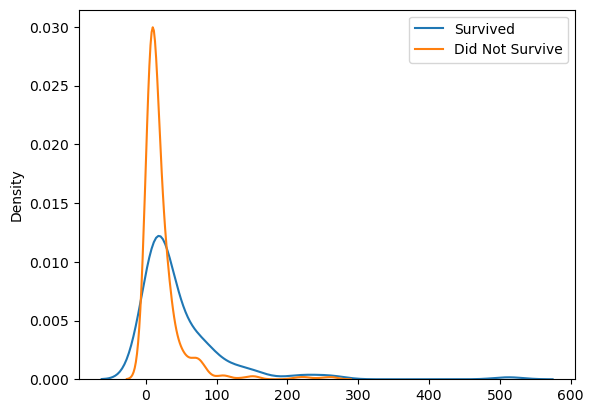

In [26]:
sns.kdeplot(x1,label='Survived')
sns.kdeplot(x2,label='Did Not Survive')
plt.legend();

In [27]:
x1.mean(),x2.mean()

(48.39540760233918, 22.117886885245902)

In [28]:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)